In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
irisd=load_iris()

##### 데이터 클래스 정보
- 'data' : 데이터
- 'target' : 라벨
- 'feature_names' : 데이터 컬럼
- 'target_names' : 라벨 컬럼
- 'DESCR' : 설명

In [3]:
irisd.__dir__

<bound method Bunch.__dir__ of {'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
   

In [4]:
irisd['target']
# 타겟이 정렬되어 있다. => 데이터가 독립적이지 않다. => 데이터를 학습시 섞어야 한다.
# 데이터셋 구분(train, test)이 없으니 데이터셋 구분 시에 셔플이 필요하다.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
irisdf=pd.DataFrame(data=irisd['data'],columns=irisd['feature_names'])
irisdf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
irisdf=pd.DataFrame(data=irisd['data'],columns=irisd['feature_names'])
irisdf['target']=irisd['target']
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### 기초통계분석 describe 결과 : 
 - 평균 분산에서 유의한 차이가 있을 것으로 예상
 - 사분위수 만으로 형태 파악 어려워 시각화

In [8]:
irisdf.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### 기초 통계 시각화
- 박스플롯
- 극단치 왜도 첨도 분포 등으로 통해 유의한 차이가 있는지 분석

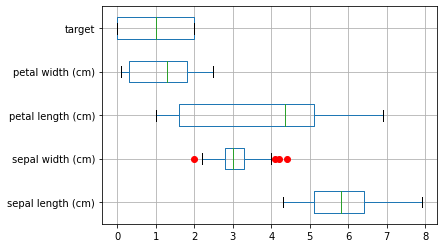

In [7]:
irisdf.boxplot(vert=0,sym='ro')
plt.show()

###### 기초 시각화
- 히스토그램
- 전체적 데이터 분포 확인

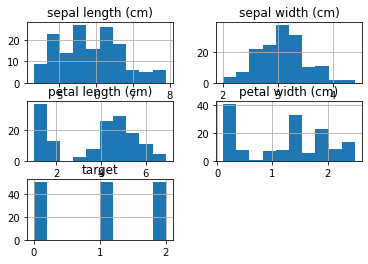

In [8]:
irisdf.hist()
plt.show()

#### 상대분석
- 상대적 영향력이나 선형성 분석을 위한 시각화
- 시각적 직관을 통해서 추후 분석 및 학습 방향을 예상

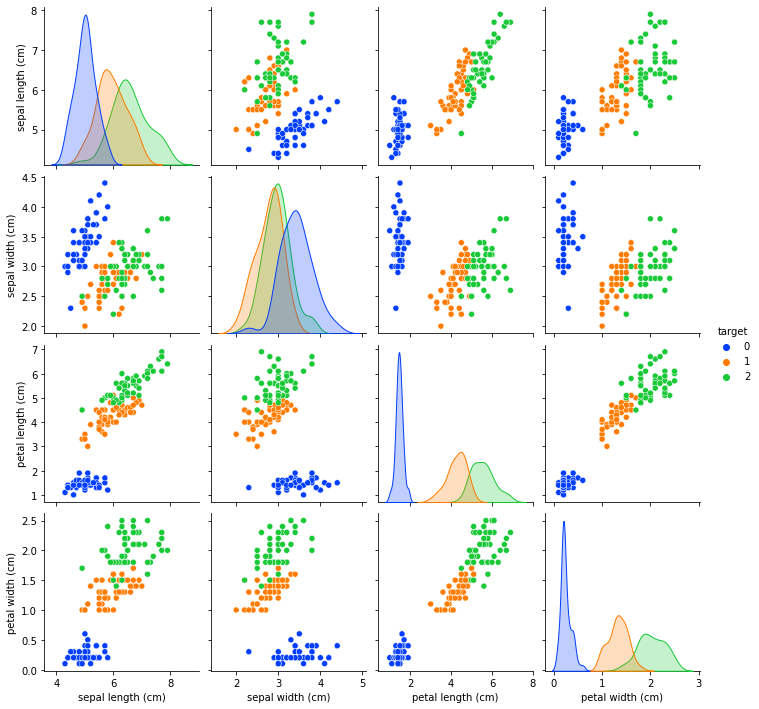

In [9]:
irisf=irisdf[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
sns.pairplot(irisdf,hue='target',palette='bright')
plt.show()

#### 목표 : sepal, petal의 폭과 길이를 통해 품종을 구별하는 모델을 구축
- 과정:
    * DT등을 사용하여 분류 모델을 학습
    * DL을 통해서 분류 모델 학습
- 머신러닝 준비:
    * 데이터 정제 : 동일 데이터 타입, 동일 조건
    * 타겟 라벨링 : 분류모델의 경우 one-hot 인코딩
    * one-hot encoding : 명확한 분류를 위해 타겟(라벨)을 배열로 표시
        - 이유 : 머신러닝 입장에서도 확률기반의 판단
        - 확률기반 판단? >> 각 라벨로 보여질 수 있는 확률을 계산
        - ML의 답 >> [0.15,0.25,0.6,0.1]
        -사용자가 원하는 답 >> [0,0,1,0]
    * 머신러닝의 평가를 위한 준비:
       - 자료를 test set과 train set으로 분리
       - test set을 통해 모델을 검증
    * 학습모델 결정 :
        - 피처특성(컬럼 숫자, 타켓의 분류 숫자) :
            * 작음 : ML/통계
            * 크다 : DL
        - 데이터셋의 크기
            * 작다 : ML을 사용
            * 크다 : DL 가능
        - 사전 통계 검증
            * 뚜렷한 분류 가능 : ML
            * 모호한 분류 : DL(답이 없다.>답 안나옴)
        

In [10]:
# ML DT 모델 준비
from sklearn.tree import DecisionTreeClassifier
# ML train set 준비
from sklearn.model_selection import train_test_split

### train_test_split()
* train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)

* (1) Parameter
    - arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)
    - test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)
    - train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)
    - random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력)
    - shuffle : 셔플여부설정 (default = True)
    - stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.
- 출처 : https://blog.naver.com/PostView.nhn?blogId=siniphia&logNo=221396370872&parentCategoryNo=&categoryNo=22&viewDate=&isShowPopularPosts=true&from=search
        

In [11]:
X_train,x_test,Y_train,y_test = train_test_split(irisd['data'],irisd['target'])

In [12]:
y_test

array([2, 2, 1, 2, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 2, 0, 1, 0, 2, 0,
       1, 0, 1, 0, 0, 2, 2, 2, 1, 1, 1, 0, 1, 2, 2, 2])

In [13]:
X_train,x_test,Y_train,y_test = train_test_split(irisd['data'],irisd['target'],random_state=1)

In [14]:
# 시드 고정을 통해 일정한 형태의 데이터 확보
y_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

#### DT(Decision Tree Classifier)
*  특징
    - 데이터 규칙 기반 학습
    - 자동으로 규칙의 트리 생성을 통한 분류 규칙을 만드는 알고리즘(if,else)
* 장점
    - 쉽고, 직관적
    - 각 피처의 스케일링과 정규화 같은 전처리 작업의 영향도 크지 않음
* 단점
    - 규칙을 추가하며 서브트리를 만들어 나갈수록 모델 복잡해짐
    - 과적합 빠지기 쉬움
    - 트리의 크기를 사전에 제한하는 튜닝이 필요
---    
* 파라미터
    - min_samples_split	
        - 노드를 분할하기 위한 최소한의 샘플 데이터수 → 과적합을 제어하는데 사용
        - Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가
    - min_samples_leaf	- 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
    - min_samples_split과 함께 과적합 제어 용도
        - 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요
    - max_features	- 최적의 분할을 위해 고려할 최대 feature 개수
        - Default = None → 데이터 세트의 모든 피처를 사용
        - int형으로 지정 →피처 갯수 / float형으로 지정 →비중
        - sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정
        - log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정

    - max_depth	
        - 트리의 최대 깊이: 자주쓰임
        - default = None
            → 완벽하게 클래스 값이 결정될 때 까지 분할
            - 또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할
            - 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요
    - max_leaf_nodes
        -리프노드의 최대 개수

#### ML
* 머신러닝 모델 결정 : DT
* 모델 학습 : fit(train 데이터 활용)
* 모델 테스트 : test 데이터의 predict(예상)을 통한 검증

In [15]:
#학습하기
dtc = DecisionTreeClassifier(max_depth=2 )
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2)

In [16]:
#테스트 예측
pred = dtc.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score
test_p = accuracy_score(y_test,pred)
print("DT 활용한 정확도 : ",test_p)

DT 활용한 정확도 :  0.9736842105263158


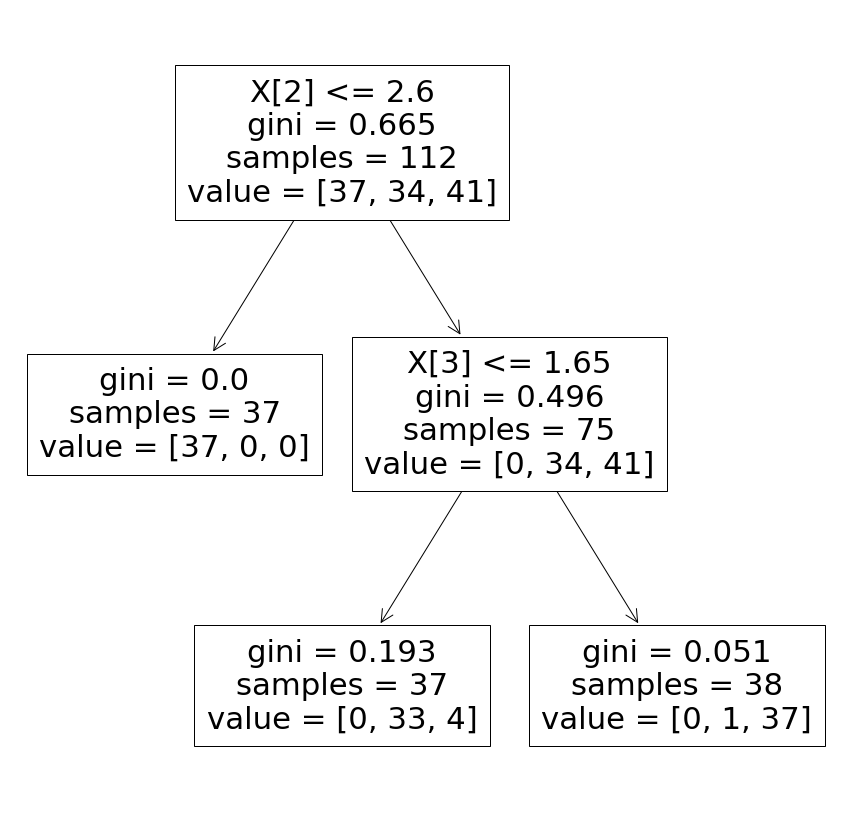

In [18]:
from sklearn.tree import plot_tree
fig,ax = plt.subplots(figsize=(15,15))
plot_tree(dtc)
plt.show()

In [43]:
!pip install graphviz

### export_graphviz
* model : train한 모델
* out_file : dot 파일 출력명
* class_names : 타겟이름
* feature_names : 특성이름
* impurity : 지니계수 여부
* filled : 색칠 여부

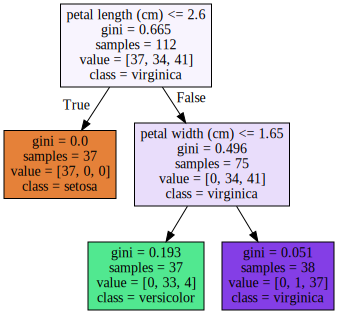

In [19]:
import graphviz
from sklearn.tree import export_graphviz
fname = 'tree.dot'
export_graphviz(dtc,out_file=fname,class_names=irisd['target_names'],
               feature_names=irisd['feature_names'],
               impurity=True,filled=True)

with open(fname) as f:
    dgraph=f.read()
dot=graphviz.Source(dgraph)
dot


In [20]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=28c87bc3eda0e0a8dfb6d2b777be7e63c53fca6289913c302f26f9d5a5a0710f
  Stored in directory: c:\users\717\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [ ]:
fimp = 

In [26]:
X_src = irisdf[['sepal length(cm)','sepal width(cm)']].values
X_src[:5]
Y_src = irisdf[['target']].values
Y_src[:5]

KeyError: "None of [Index(['sepal length(cm)', 'sepal width(cm)'], dtype='object')] are in the [columns]"

In [24]:
X_train[:4]

array([[6.5, 2.8, 4.6, 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3. , 5.5, 2.1],
       [5.1, 3.5, 1.4, 0.3]])

In [23]:
from mglearn.plots import plot_2d_classification
from mglearn import discrete_scatter

#plot_2d_classification(dtc,X_train,eps=0.5,cm='spring')

In [25]:
irisd.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [22]:
sns.barplot(y=irisd.feature_names,x=fimp)
plt.show()

NameError: name 'fimp' is not defined